## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')

## Load source datasets

In [2]:
train = pd.read_csv("../input/mh-analytics-olympiad-2022/AnalyticsOlympiad2022Data/train.csv")
print(f"train: {train.shape}")
train.head()

train: (105000, 18)


,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


In [3]:
test = pd.read_csv("../input/mh-analytics-olympiad-2022/AnalyticsOlympiad2022Data/test.csv")
print(f"test: {test.shape}")
test.head()

test: (45000, 17)


,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,352928,40-64,male,10-19y,none,working class,0.814707,1.0,after 2015,0.0,1.0,10238,10000.0,0,0,0,HatchBack
1,38579,26-39,female,20-29y,high school,upper class,0.344051,1.0,before 2015,0.0,0.0,34073,13000.0,0,0,0,Sedan
2,504022,40-64,male,10-19y,none,upper class,0.620691,0.0,after 2015,1.0,0.0,10238,12000.0,0,0,0,SUV
3,202404,26-39,male,20-29y,high school,upper class,0.689658,1.0,after 2015,1.0,1.0,10238,16000.0,1,0,0,SUV
4,527913,65+,male,10-19y,none,middle class,0.755666,0.0,after 2015,0.0,1.0,92101,14000.0,2,0,0,HatchBack


In [4]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [5]:
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   45000 non-null  int64  
 1   AGE                  45000 non-null  object 
 2   GENDER               45000 non-null  object 
 3   DRIVING_EXPERIENCE   45000 non-null  object 
 4   EDUCATION            45000 non-null  object 
 5   INCOME               45000 non-null  object 
 6   CREDIT_SCORE         45000 non-null  float64
 7   VEHICLE_OWNERSHIP    45000 non-null  float64
 8   VEHICLE_YEAR         45000 non-null  object 
 9   MARRIED              45000 non-null  float64
 10  CHILDREN             45000 non-null  float64
 11  POSTAL_CODE          45000 non-null  int64  
 12  ANNUAL_MILEAGE       45000 non-null  float64
 13  SPEEDING_VIOLATIONS  45000 non-null  int64  
 14  DUIS                 45000 non-null  int64  
 15  PAST_ACCIDENTS       45000 non-null 

## Leakage and duplication check

In [6]:
join_cols = [col for col in test.columns if col not in ['ID','CREDIT_SCORE']]

leakage_df = pd.merge(
    train,
    test,
    on=join_cols,
    how='inner',
    sort=False
)

print(f"leakage_df: {leakage_df.shape}")
leakage_df.head()

leakage_df: (8522, 20)


,ID_x,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE_x,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE,ID_y,CREDIT_SCORE_y
0,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack,134443,0.519003
1,311287,26-39,male,20-29y,high school,middle class,0.661254,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack,134443,0.519003
2,193319,26-39,female,20-29y,high school,upper class,0.827475,1.0,after 2015,1.0,1.0,10238,9000.0,0,0,0,0.0,Sedan,427163,0.624463
3,504224,26-39,male,20-29y,high school,working class,0.564682,1.0,before 2015,0.0,0.0,10238,11000.0,0,0,0,0.0,Sedan,720797,0.759290
4,402084,65+,female,0-9y,high school,upper class,0.673251,1.0,before 2015,0.0,1.0,10238,10000.0,0,0,0,0.0,Sedan,35030,0.625393


In [7]:
dup_cols = [col for col in test.columns if col not in ['ID','CREDIT_SCORE']]
duplicate_df = test[test.duplicated(subset=dup_cols, keep=False)].copy()
print(f"duplicate_df: {duplicate_df.shape}")
duplicate_df.sort_values(by=join_cols+['CREDIT_SCORE']).head(10)

duplicate_df: (3089, 17)


,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
27283,47948,16-25,female,0-9y,high school,middle class,0.346336,1.0,before 2015,0.0,0.0,10238,10000.0,0,0,0,SUV
33691,630089,16-25,female,0-9y,high school,middle class,0.633514,1.0,before 2015,0.0,0.0,10238,10000.0,0,0,0,SUV
7158,74990,16-25,female,0-9y,high school,middle class,0.429592,1.0,before 2015,1.0,1.0,10238,12000.0,1,0,1,Sedan
27822,1800,16-25,female,0-9y,high school,middle class,0.507949,1.0,before 2015,1.0,1.0,10238,12000.0,1,0,1,Sedan
36706,91500,16-25,female,0-9y,high school,upper class,0.452876,1.0,after 2015,0.0,1.0,10238,13000.0,0,0,0,HatchBack
20372,31803,16-25,female,0-9y,high school,upper class,0.633839,1.0,after 2015,0.0,1.0,10238,13000.0,0,0,0,HatchBack
41098,979188,16-25,female,0-9y,high school,upper class,0.733522,1.0,after 2015,1.0,0.0,10238,10000.0,0,0,0,Sedan
31514,552513,16-25,female,0-9y,high school,upper class,0.848594,1.0,after 2015,1.0,0.0,10238,10000.0,0,0,0,Sedan
42299,380807,16-25,female,0-9y,high school,upper class,0.670233,1.0,after 2015,1.0,0.0,10238,10000.0,0,0,0,Sports Car
18052,643494,16-25,female,0-9y,high school,upper class,0.787450,1.0,after 2015,1.0,0.0,10238,10000.0,0,0,0,Sports Car


In [8]:
dup_cols = [col for col in train.columns if col not in ['ID','CREDIT_SCORE']]
duplicate_df = train[train.duplicated(subset=dup_cols, keep=False)].copy()
print(f"duplicate_df: {duplicate_df.shape}")
duplicate_df.sort_values(by=join_cols+['CREDIT_SCORE']).head(10)

duplicate_df: (8050, 18)


,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
46277,244094,16-25,female,0-9y,high school,middle class,0.466959,1.0,after 2015,1.0,1.0,10238,10000.0,1,0,0,0.0,Sports Car
87776,84954,16-25,female,0-9y,high school,middle class,0.641753,1.0,after 2015,1.0,1.0,10238,10000.0,1,0,0,0.0,Sports Car
40639,3708,16-25,female,0-9y,high school,poverty,0.555469,0.0,before 2015,1.0,1.0,10238,13000.0,0,0,0,1.0,Sports Car
36259,166677,16-25,female,0-9y,high school,poverty,0.572972,0.0,before 2015,1.0,1.0,10238,13000.0,0,0,0,1.0,Sports Car
90178,561134,16-25,female,0-9y,high school,poverty,0.331835,1.0,before 2015,0.0,1.0,10238,14000.0,0,0,1,1.0,HatchBack
9864,515957,16-25,female,0-9y,high school,poverty,0.649018,1.0,before 2015,0.0,1.0,10238,14000.0,0,0,1,1.0,HatchBack
47788,452530,16-25,female,0-9y,high school,poverty,0.568537,1.0,before 2015,1.0,0.0,10238,11000.0,0,0,0,1.0,Sports Car
75420,951466,16-25,female,0-9y,high school,poverty,0.693290,1.0,before 2015,1.0,0.0,10238,11000.0,0,0,0,1.0,Sports Car
55396,116571,16-25,female,0-9y,high school,upper class,0.591298,1.0,after 2015,1.0,0.0,10238,14000.0,0,0,0,0.0,Sedan
60523,594370,16-25,female,0-9y,high school,upper class,0.727889,1.0,after 2015,1.0,0.0,10238,14000.0,0,0,0,0.0,Sedan


In [9]:
df = pd.merge(
    duplicate_df,
    test,
    on=join_cols,
    how='inner',
    sort=False
)

df.head(10)

,ID_x,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE_x,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE,ID_y,CREDIT_SCORE_y
0,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack,134443,0.519003
1,311287,26-39,male,20-29y,high school,middle class,0.661254,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack,134443,0.519003
2,402084,65+,female,0-9y,high school,upper class,0.673251,1.0,before 2015,0.0,1.0,10238,10000.0,0,0,0,0.0,Sedan,35030,0.625393
3,180352,65+,female,0-9y,high school,upper class,0.813868,1.0,before 2015,0.0,1.0,10238,10000.0,0,0,0,0.0,Sedan,35030,0.625393
4,162060,65+,female,0-9y,high school,upper class,0.692384,1.0,before 2015,0.0,1.0,10238,10000.0,0,0,0,0.0,Sedan,35030,0.625393
5,257016,65+,male,20-29y,high school,upper class,0.613454,1.0,before 2015,0.0,0.0,10238,7000.0,0,0,0,0.0,SUV,3497,0.560982
6,471922,65+,male,20-29y,high school,upper class,0.682522,1.0,before 2015,0.0,0.0,10238,7000.0,0,0,0,0.0,SUV,3497,0.560982
7,592897,40-64,male,20-29y,university,upper class,0.489278,1.0,after 2015,0.0,1.0,10238,14000.0,1,0,0,1.0,Sports Car,295271,0.925344
8,592897,40-64,male,20-29y,university,upper class,0.489278,1.0,after 2015,0.0,1.0,10238,14000.0,1,0,0,1.0,Sports Car,256458,0.381909
9,756278,40-64,male,20-29y,university,upper class,0.649697,1.0,after 2015,0.0,1.0,10238,14000.0,1,0,0,1.0,Sports Car,295271,0.925344


## Target data distribution

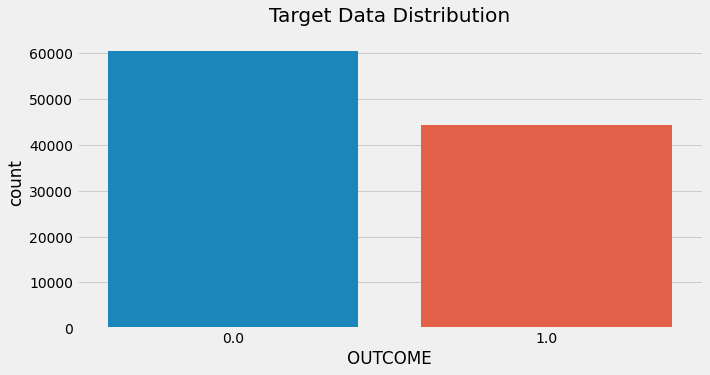

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='OUTCOME', data=train)
plt.title("Target Data Distribution", pad=15);

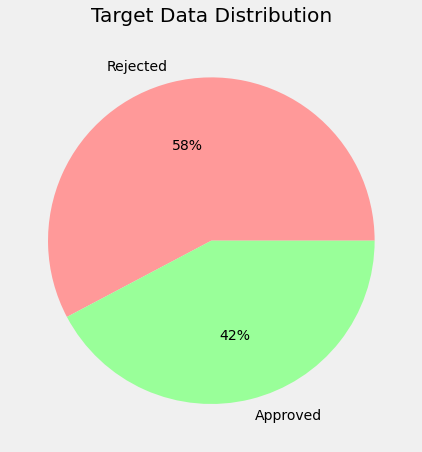

In [11]:
df = train['OUTCOME'].value_counts().reset_index()

plt.figure(figsize=(12, 7))
plt.pie(df['OUTCOME'], labels=['Rejected','Approved'], 
        colors=['#ff9999','#99ff99'], autopct='%.0f%%')
plt.title("Target Data Distribution", pad=15);

## Feature-wise EDA

### ID

In [12]:
train['ID0'] = train['ID'].apply(lambda x: int(str(x)[0]) if len(str(x))>5 else 0)
train['ID1'] = train['ID'].apply(lambda x: int(str(x)[-5]) if len(str(x))>4 else 0)
train['ID2'] = train['ID'].apply(lambda x: int(str(x)[-4]) if len(str(x))>3 else 0)
train['ID3'] = train['ID'].apply(lambda x: int(str(x)[-3]) if len(str(x))>2 else 0)
train['ID4'] = train['ID'].apply(lambda x: int(str(x)[-2]) if len(str(x))>1 else 0)
train['ID5'] = train['ID'].apply(lambda x: int(str(x)[-1]) if len(str(x))>0 else 0)
train.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,...,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE,ID0,ID1,ID2,ID3,ID4,ID5
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,...,0,0,0.0,Sports Car,8,1,6,3,9,3
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,...,0,0,1.0,HatchBack,2,5,1,7,6,2
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,...,0,0,1.0,Sedan,4,8,1,9,5,2
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,...,0,0,1.0,Sedan,0,0,3,5,0,6
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,...,0,1,0.0,Sedan,4,9,8,0,1,3


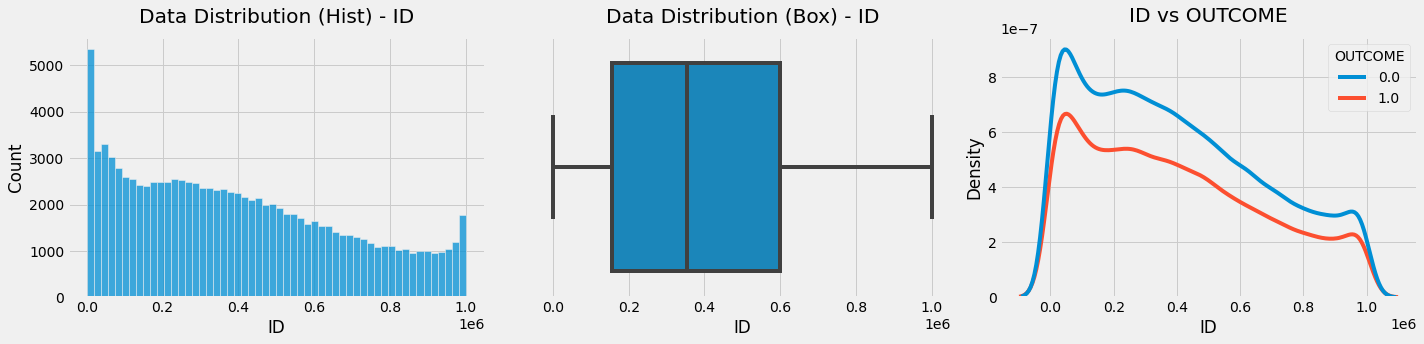

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(x='ID', data=train, ax=ax[0])
sns.boxplot(x='ID', data=train, ax=ax[1])
sns.kdeplot(x='ID', hue='OUTCOME', data=train, ax=ax[2])
ax[0].set_title(f"Data Distribution (Hist) - ID", pad=15)
ax[1].set_title(f"Data Distribution (Box) - ID", pad=15)
ax[2].set_title(f"ID vs OUTCOME", pad=15)
fig.tight_layout();

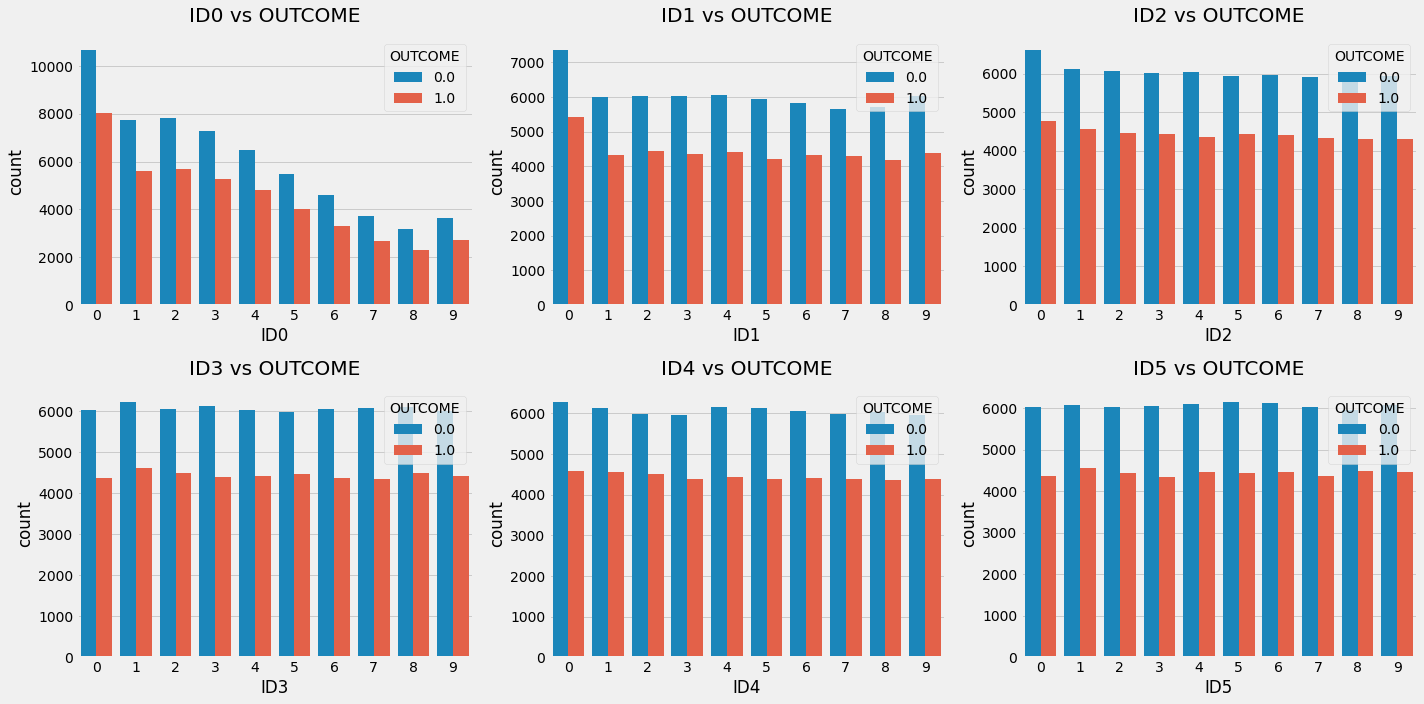

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.countplot(x='ID0', hue='OUTCOME', data=train, ax=ax[0][0])
sns.countplot(x='ID1', hue='OUTCOME', data=train, ax=ax[0][1])
sns.countplot(x='ID2', hue='OUTCOME', data=train, ax=ax[0][2])
sns.countplot(x='ID3', hue='OUTCOME', data=train, ax=ax[1][0])
sns.countplot(x='ID4', hue='OUTCOME', data=train, ax=ax[1][1])
sns.countplot(x='ID5', hue='OUTCOME', data=train, ax=ax[1][2])
ax[0][0].set_title(f"ID0 vs OUTCOME", pad=15)
ax[0][1].set_title(f"ID1 vs OUTCOME", pad=15)
ax[0][2].set_title(f"ID2 vs OUTCOME", pad=15)
ax[1][0].set_title(f"ID3 vs OUTCOME", pad=15)
ax[1][1].set_title(f"ID4 vs OUTCOME", pad=15)
ax[1][2].set_title(f"ID5 vs OUTCOME", pad=15)
fig.tight_layout();

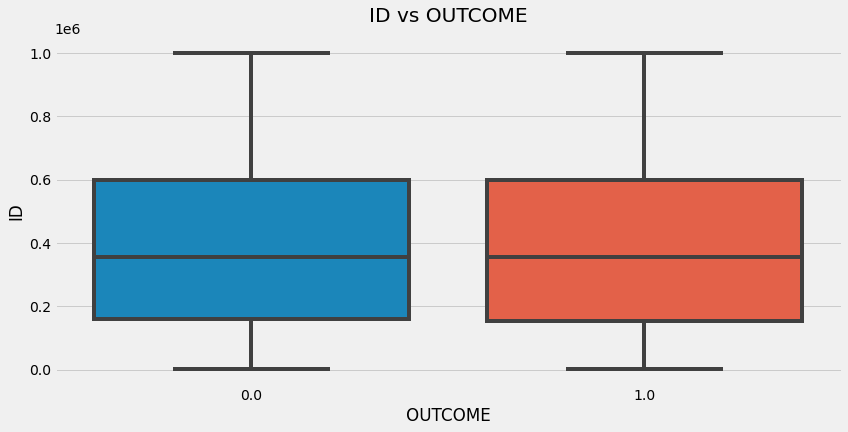

In [15]:
sns.catplot(y='ID', x='OUTCOME', kind="box", data=train, height=6, aspect=2)
plt.title('ID vs OUTCOME', pad=15);

### AGE

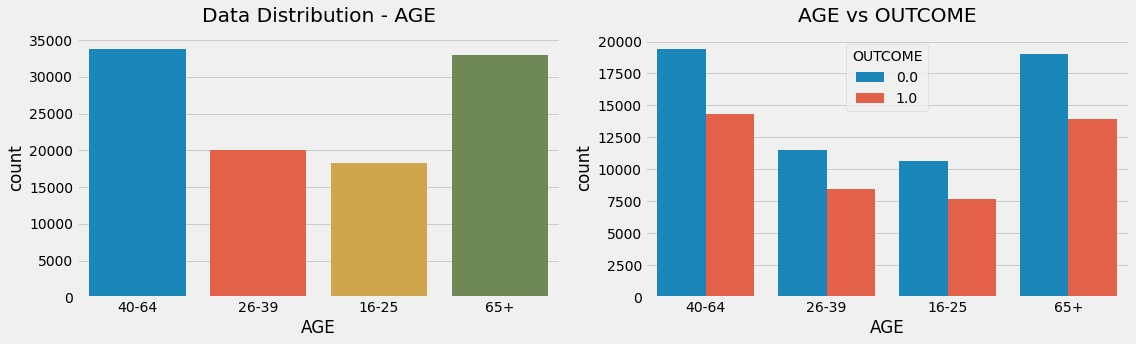

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(x='AGE', data=train, ax=ax[0])
sns.countplot(x='AGE', hue='OUTCOME', data=train, ax=ax[1])
ax[0].set_title(f"Data Distribution - AGE", pad=15)
ax[1].set_title(f"AGE vs OUTCOME", pad=15)
fig.tight_layout();

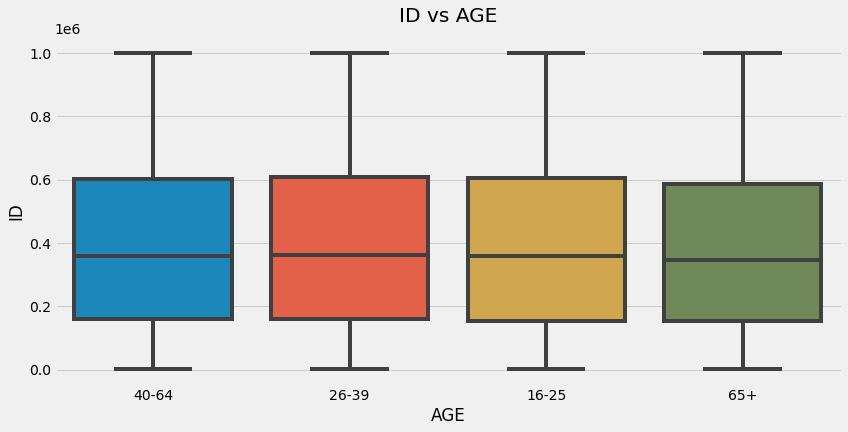

In [17]:
sns.catplot(y='ID', x='AGE', kind="box", data=train, height=6, aspect=2)
plt.title('ID vs AGE', pad=15);

### GENDER

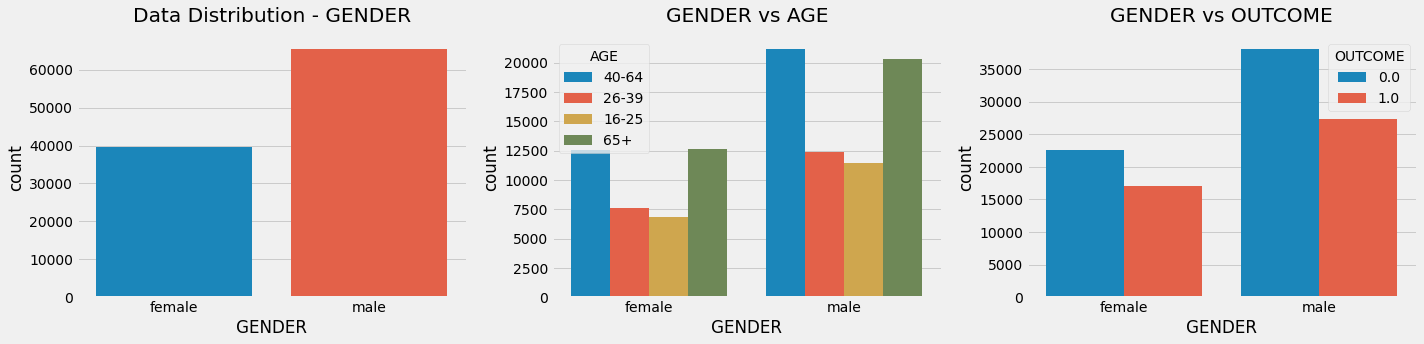

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(x='GENDER', data=train, ax=ax[0])
sns.countplot(x='GENDER', hue='AGE', data=train, ax=ax[1])
sns.countplot(x='GENDER', hue='OUTCOME', data=train, ax=ax[2])
ax[0].set_title(f"Data Distribution - GENDER", pad=15)
ax[1].set_title(f"GENDER vs AGE", pad=15)
ax[2].set_title(f"GENDER vs OUTCOME", pad=15)
fig.tight_layout();

### DRIVING_EXPERIENCE

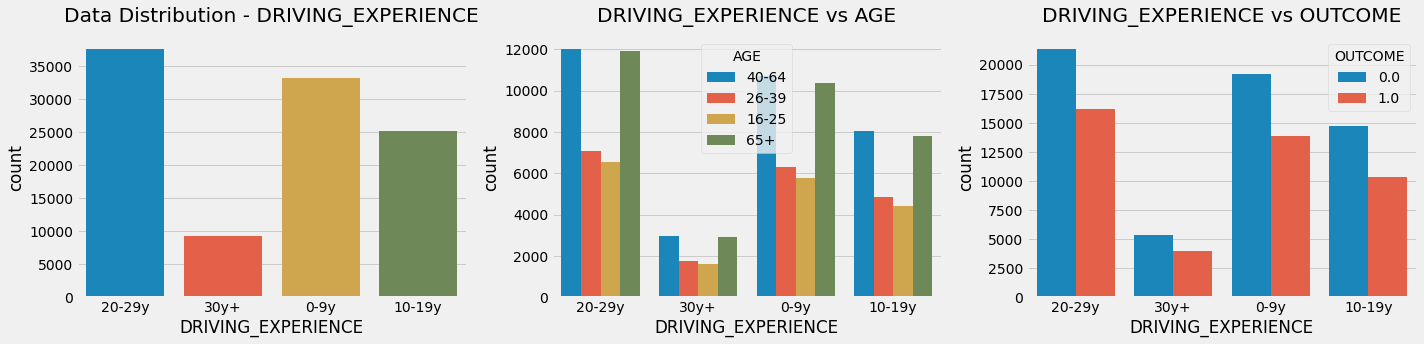

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(x='DRIVING_EXPERIENCE', data=train, ax=ax[0])
sns.countplot(x='DRIVING_EXPERIENCE', hue='AGE', data=train, ax=ax[1])
sns.countplot(x='DRIVING_EXPERIENCE', hue='OUTCOME', data=train, ax=ax[2])
ax[0].set_title(f"Data Distribution - DRIVING_EXPERIENCE", pad=15)
ax[1].set_title(f"DRIVING_EXPERIENCE vs AGE", pad=15)
ax[2].set_title(f"DRIVING_EXPERIENCE vs OUTCOME", pad=15)
fig.tight_layout();

### EDUCATION

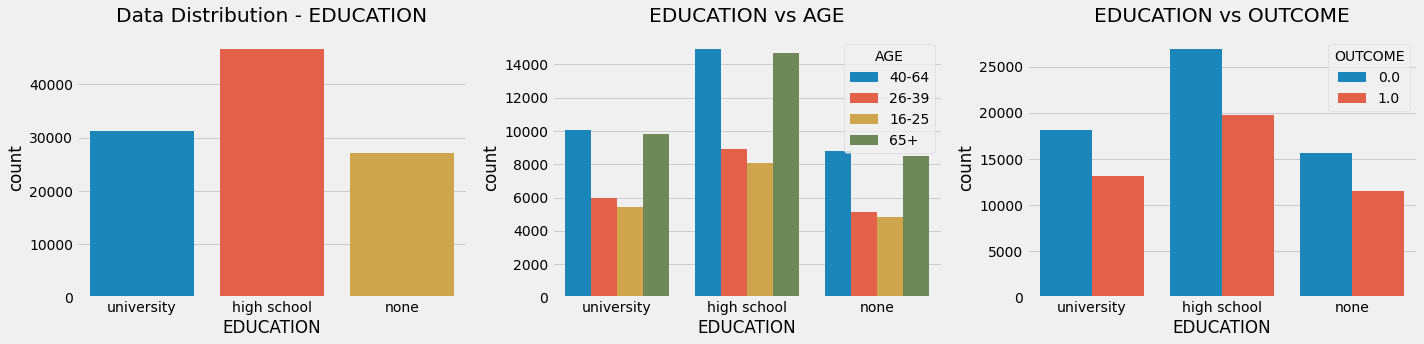

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(x='EDUCATION', data=train, ax=ax[0])
sns.countplot(x='EDUCATION', hue='AGE', data=train, ax=ax[1])
sns.countplot(x='EDUCATION', hue='OUTCOME', data=train, ax=ax[2])
ax[0].set_title(f"Data Distribution - EDUCATION", pad=15)
ax[1].set_title(f"EDUCATION vs AGE", pad=15)
ax[2].set_title(f"EDUCATION vs OUTCOME", pad=15)
fig.tight_layout();

### INCOME

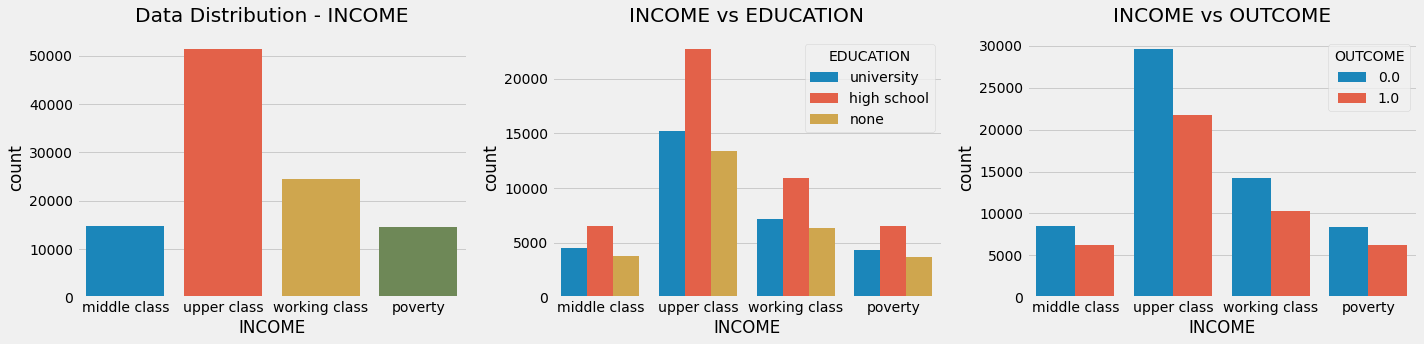

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(x='INCOME', data=train, ax=ax[0])
sns.countplot(x='INCOME', hue='EDUCATION', data=train, ax=ax[1])
sns.countplot(x='INCOME', hue='OUTCOME', data=train, ax=ax[2])
ax[0].set_title(f"Data Distribution - INCOME", pad=15)
ax[1].set_title(f"INCOME vs EDUCATION", pad=15)
ax[2].set_title(f"INCOME vs OUTCOME", pad=15)
fig.tight_layout();

### CREDIT_SCORE

In [22]:
train['CREDIT_SCORE_BIN'] = train['CREDIT_SCORE'].apply(lambda x: 0 if x<=0.2 
                                                        else 1 if x>0.2 and x<=0.4 
                                                        else 2 if x>0.4 and x<=0.6 
                                                        else 3 if x>0.6 and x<=0.8 
                                                        else 4)

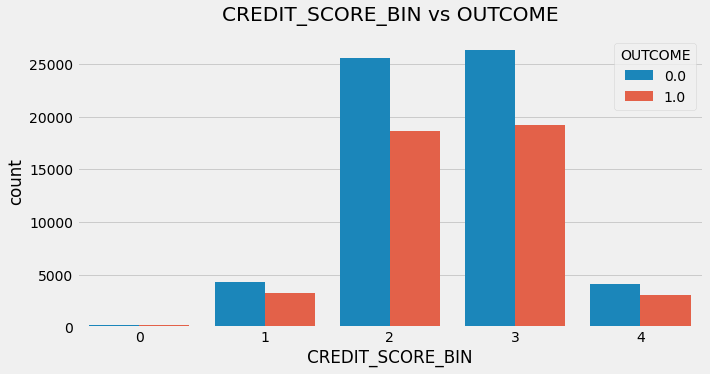

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='CREDIT_SCORE_BIN', hue='OUTCOME', data=train)
plt.title("CREDIT_SCORE_BIN vs OUTCOME", pad=15);

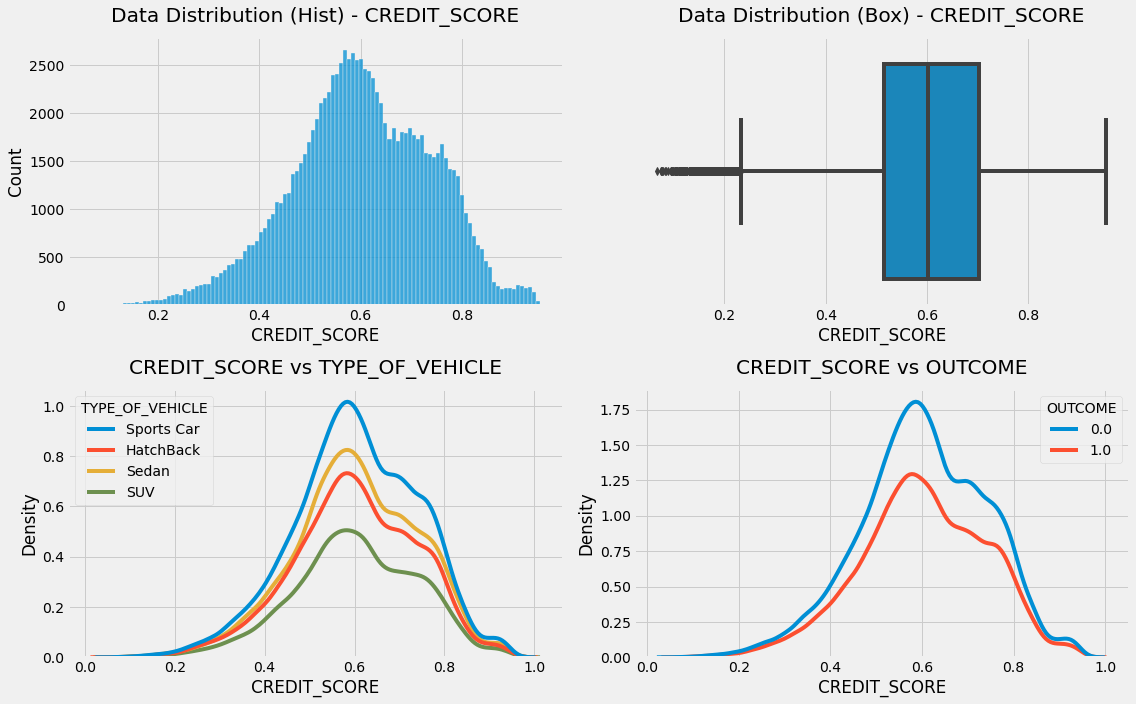

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.histplot(x='CREDIT_SCORE', data=train, ax=ax[0][0])
sns.boxplot(x='CREDIT_SCORE', data=train, ax=ax[0][1])
sns.kdeplot(x='CREDIT_SCORE', hue='TYPE_OF_VEHICLE', data=train, ax=ax[1][0])
sns.kdeplot(x='CREDIT_SCORE', hue='OUTCOME', data=train, ax=ax[1][1])
ax[0][0].set_title(f"Data Distribution (Hist) - CREDIT_SCORE", pad=15)
ax[0][1].set_title(f"Data Distribution (Box) - CREDIT_SCORE", pad=15)
ax[1][0].set_title(f"CREDIT_SCORE vs TYPE_OF_VEHICLE", pad=15)
ax[1][1].set_title(f"CREDIT_SCORE vs OUTCOME", pad=15)
fig.tight_layout();

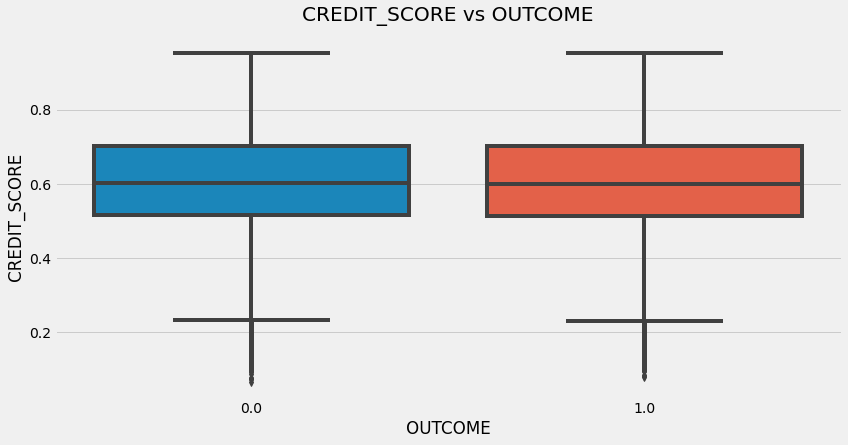

In [25]:
sns.catplot(y='CREDIT_SCORE', x='OUTCOME', kind="box", data=train, height=6, aspect=2)
plt.title('CREDIT_SCORE vs OUTCOME', pad=15);

### VEHICLE_OWNERSHIP

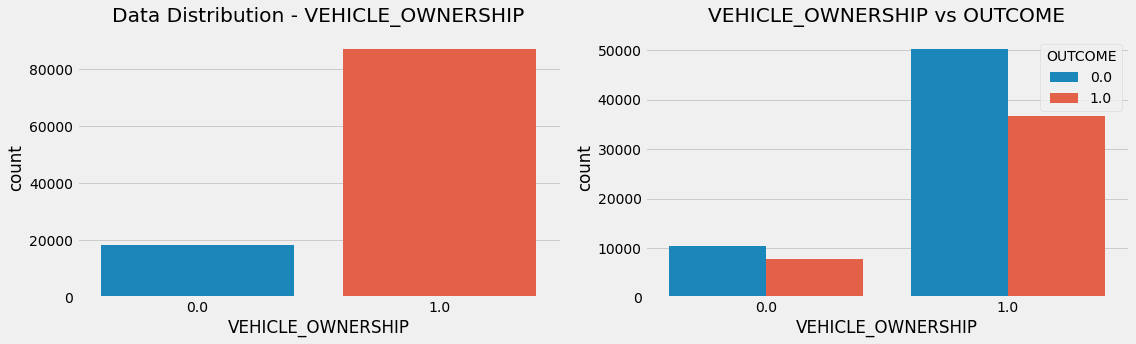

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(x='VEHICLE_OWNERSHIP', data=train, ax=ax[0])
sns.countplot(x='VEHICLE_OWNERSHIP', hue='OUTCOME', data=train, ax=ax[1])
ax[0].set_title(f"Data Distribution - VEHICLE_OWNERSHIP", pad=15)
ax[1].set_title(f"VEHICLE_OWNERSHIP vs OUTCOME", pad=15)
fig.tight_layout();

### VEHICLE_YEAR

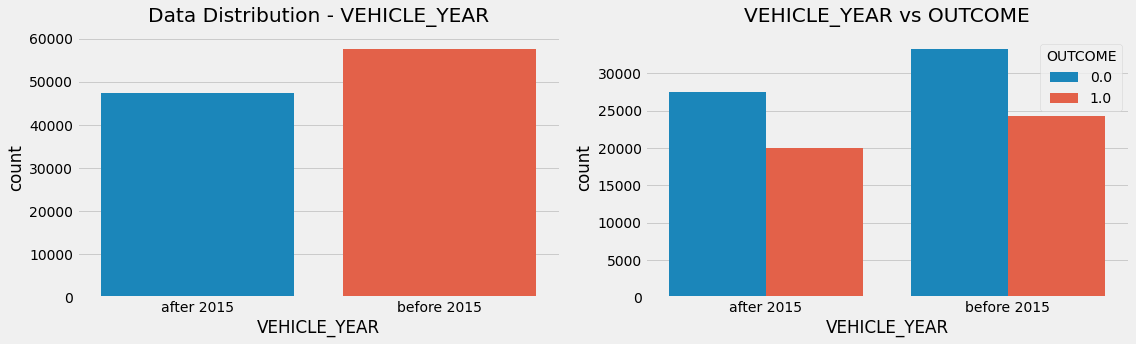

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(x='VEHICLE_YEAR', data=train, ax=ax[0])
sns.countplot(x='VEHICLE_YEAR', hue='OUTCOME', data=train, ax=ax[1])
ax[0].set_title(f"Data Distribution - VEHICLE_YEAR", pad=15)
ax[1].set_title(f"VEHICLE_YEAR vs OUTCOME", pad=15)
fig.tight_layout();

### MARRIED

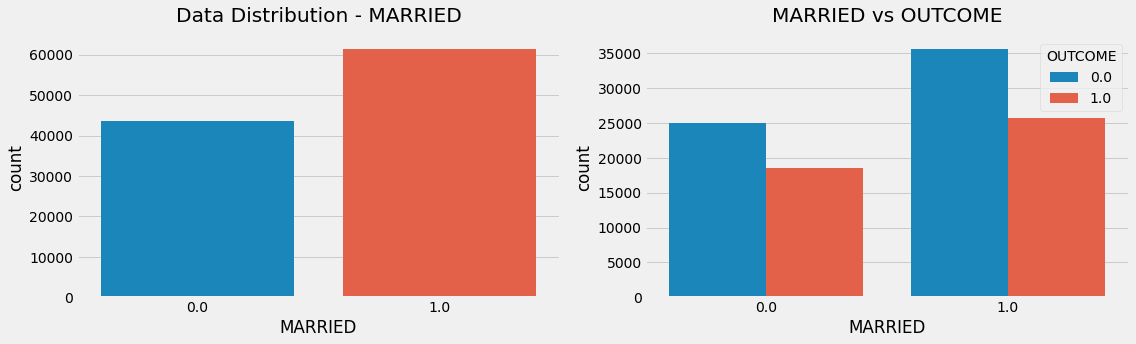

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(x='MARRIED', data=train, ax=ax[0])
sns.countplot(x='MARRIED', hue='OUTCOME', data=train, ax=ax[1])
ax[0].set_title(f"Data Distribution - MARRIED", pad=15)
ax[1].set_title(f"MARRIED vs OUTCOME", pad=15)
fig.tight_layout();

### CHILDREN

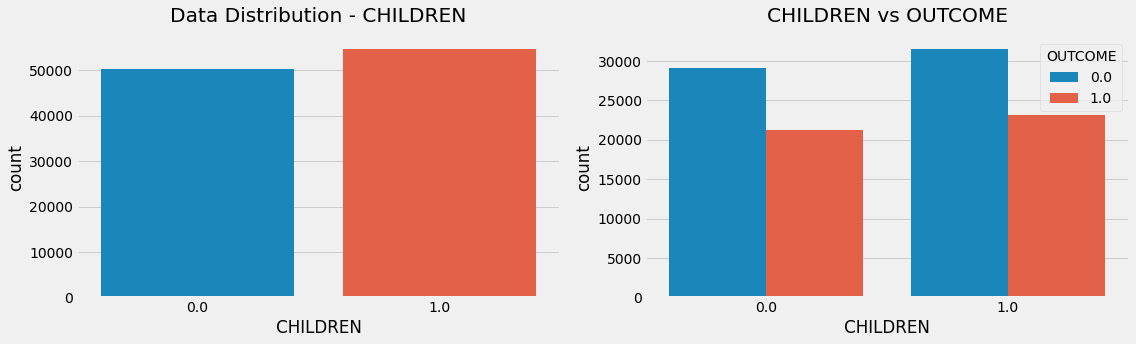

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(x='CHILDREN', data=train, ax=ax[0])
sns.countplot(x='CHILDREN', hue='OUTCOME', data=train, ax=ax[1])
ax[0].set_title(f"Data Distribution - CHILDREN", pad=15)
ax[1].set_title(f"CHILDREN vs OUTCOME", pad=15)
fig.tight_layout();

### POSTAL_CODE

In [30]:
train['US_STATE'] = train['POSTAL_CODE'].apply(
    lambda x: 
    'AL' if x>=35004 and x<=36925 else
    'AK' if x>=99501 and x<=99950 else
    'AZ' if x>=85001 and x<=86556 else
    'AR' if x>=71601 and x<=72959 else
    'CA' if x>=90001 and x<=96162 else
    'CO' if x>=80001 and x<=81658 else
    'CT' if x>=6001  and x<=6928  else
    'DE' if x>=19701 and x<=19980 else
    'FL' if x>=32003 and x<=34997 else
    'GA' if x>=30002 and x<=39901 else
    'HI' if x>=96701 and x<=96898 else
    'ID' if x>=83201 and x<=83877 else
    'IL' if x>=60001 and x<=62999 else
    'IN' if x>=46001 and x<=47997 else
    'IA' if x>=50001 and x<=52809 else
    'KS' if x>=66002 and x<=67954 else
    'KY' if x>=40003 and x<=42788 else
    'LA' if x>=70001 and x<=71497 else
    'ME' if x>=3901  and x<=4992  else
    'MD' if x>=20588 and x<=21930 else
    'MA' if x>=1001  and x<=5544  else
    'MI' if x>=48001 and x<=49971 else
    'MN' if x>=55001 and x<=56763 else
    'MS' if x>=38601 and x<=39776 else
    'MO' if x>=63001 and x<=65899 else
    'MT' if x>=59001 and x<=59937 else
    'NE' if x>=68001 and x<=69367 else
    'NV' if x>=88901 and x<=89883 else
    'NH' if x>=3031  and x<=3897  else
    'NJ' if x>=7001  and x<=8989  else
    'NM' if x>=87001 and x<=88439 else
    'NY' if x>=501   and x<=14925 else
    'NC' if x>=27006 and x<=28909 else
    'ND' if x>=58001 and x<=58856 else
    'OH' if x>=43001 and x<=45999 else
    'OK' if x>=73001 and x<=74966 else
    'OR' if x>=97001 and x<=97920 else
    'PA' if x>=15001 and x<=19640 else
    'RI' if x>=2801  and x<=2940  else
    'SC' if x>=29001 and x<=29945 else
    'SD' if x>=57001 and x<=57799 else
    'TN' if x>=37010 and x<=38589 else
    'TX' if x>=73301 and x<=88595 else
    'UT' if x>=84001 and x<=84791 else
    'VT' if x>=5001  and x<=5907  else
    'VA' if x>=20101 and x<=24658 else
    'WA' if x>=98001 and x<=99403 else
    'WV' if x>=24701 and x<=26886 else
    'WI' if x>=53001 and x<=54990 else
    'WY' if x>=82001 and x<=83414 else
    'Not Available'
)

train.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,...,OUTCOME,TYPE_OF_VEHICLE,ID0,ID1,ID2,ID3,ID4,ID5,CREDIT_SCORE_BIN,US_STATE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,...,0.0,Sports Car,8,1,6,3,9,3,3,GA
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,...,1.0,HatchBack,2,5,1,7,6,2,2,NY
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,...,1.0,Sedan,4,8,1,9,5,2,4,NY
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,...,1.0,Sedan,0,0,3,5,0,6,3,CA
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,...,0.0,Sedan,4,9,8,0,1,3,2,FL


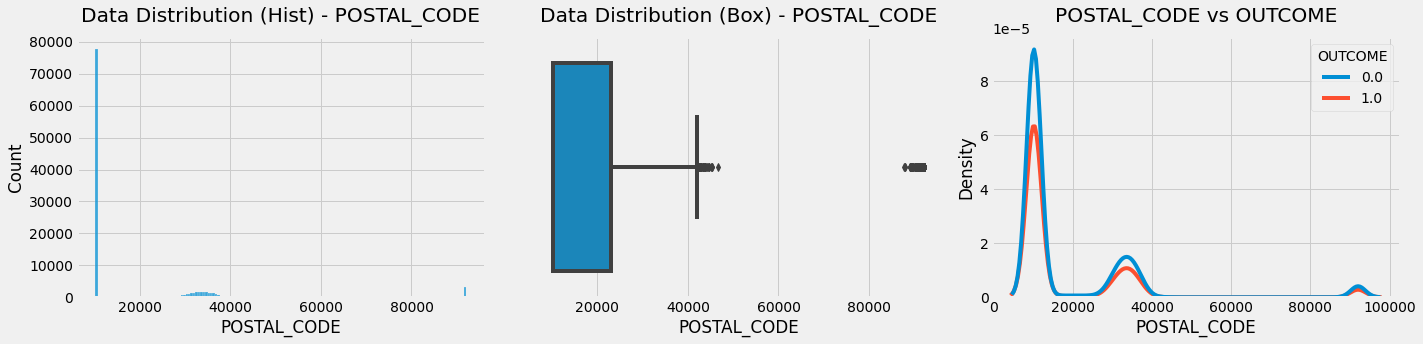

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(x='POSTAL_CODE', data=train, ax=ax[0])
sns.boxplot(x='POSTAL_CODE', data=train, ax=ax[1])
sns.kdeplot(x='POSTAL_CODE', hue='OUTCOME', data=train, ax=ax[2])
ax[0].set_title(f"Data Distribution (Hist) - POSTAL_CODE", pad=15)
ax[1].set_title(f"Data Distribution (Box) - POSTAL_CODE", pad=15)
ax[2].set_title(f"POSTAL_CODE vs OUTCOME", pad=15)
fig.tight_layout();

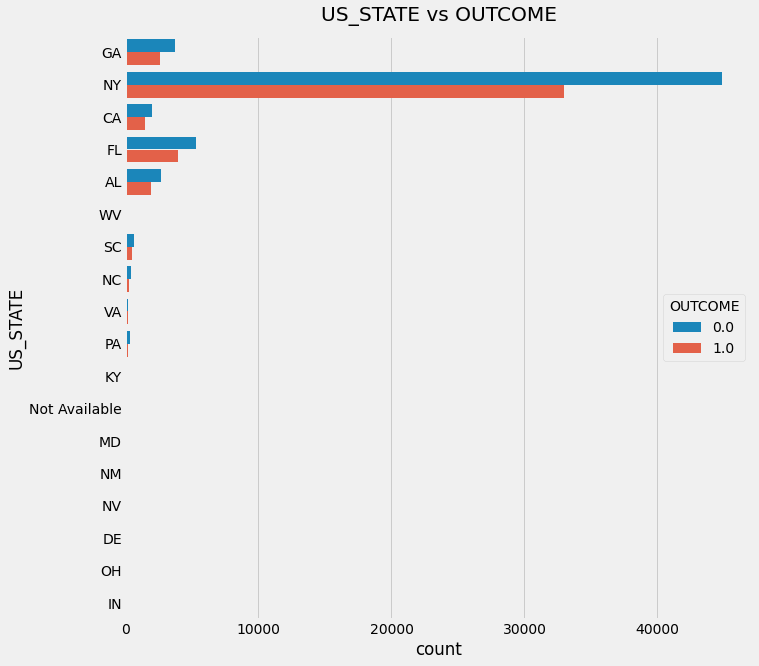

In [32]:
plt.figure(figsize=(10, 10))
sns.countplot(y='US_STATE', hue='OUTCOME', data=train)
plt.title(f"US_STATE vs OUTCOME", pad=15);

### ANNUAL_MILEAGE

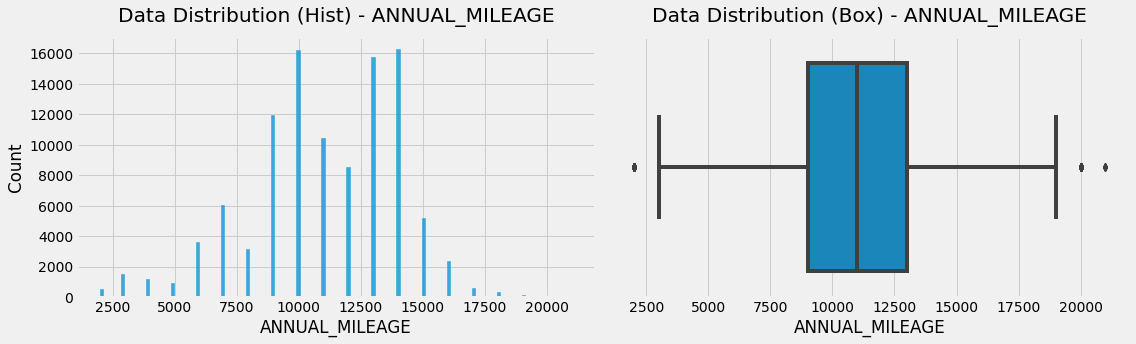

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(x='ANNUAL_MILEAGE', data=train, ax=ax[0])
sns.boxplot(x='ANNUAL_MILEAGE', data=train, ax=ax[1])
ax[0].set_title(f"Data Distribution (Hist) - ANNUAL_MILEAGE", pad=15)
ax[1].set_title(f"Data Distribution (Box) - ANNUAL_MILEAGE", pad=15)
fig.tight_layout();

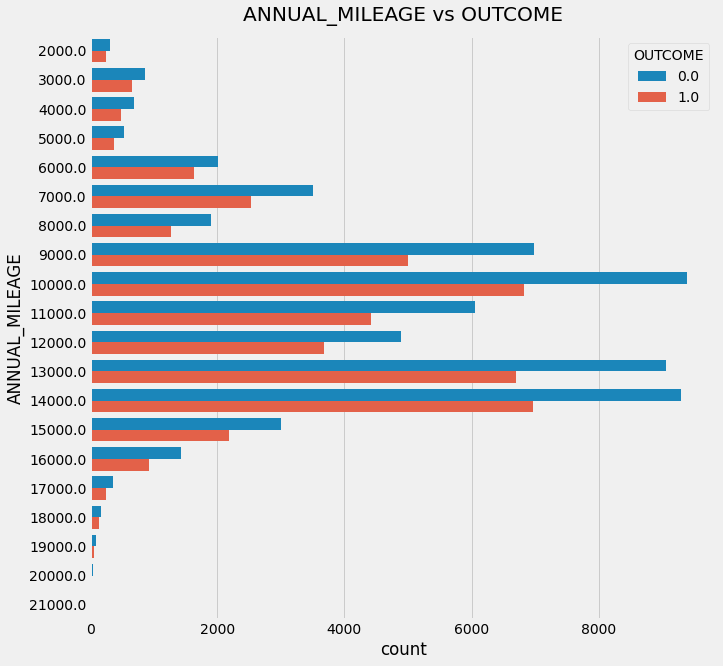

In [34]:
plt.figure(figsize=(10, 10))
sns.countplot(y='ANNUAL_MILEAGE', hue='OUTCOME', data=train)
plt.title(f"ANNUAL_MILEAGE vs OUTCOME", pad=15);

### SPEEDING_VIOLATIONS

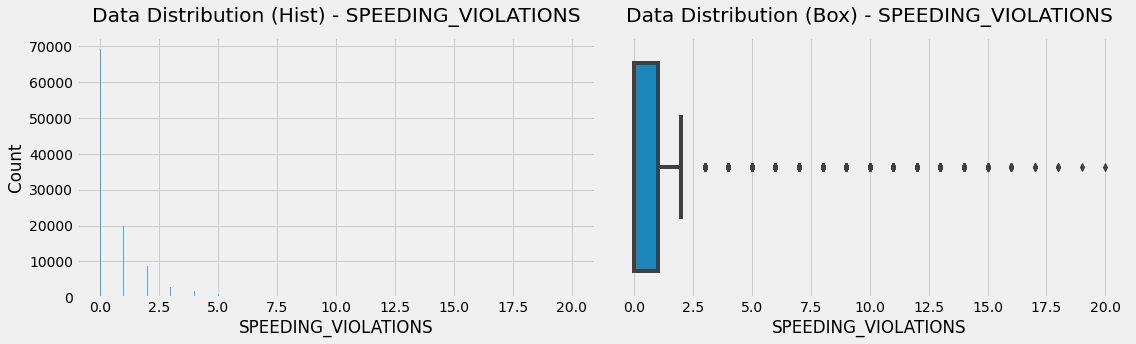

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(x='SPEEDING_VIOLATIONS', data=train, ax=ax[0])
sns.boxplot(x='SPEEDING_VIOLATIONS', data=train, ax=ax[1])
ax[0].set_title(f"Data Distribution (Hist) - SPEEDING_VIOLATIONS", pad=15)
ax[1].set_title(f"Data Distribution (Box) - SPEEDING_VIOLATIONS", pad=15)
fig.tight_layout();

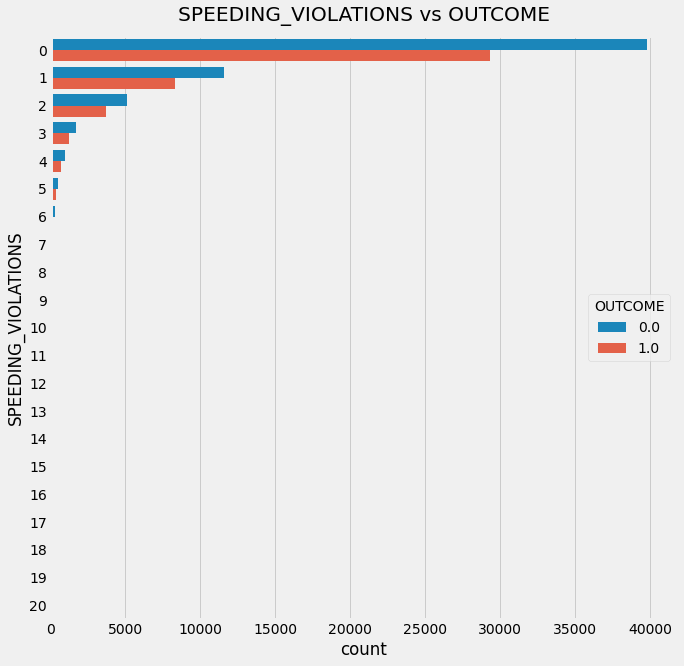

In [36]:
plt.figure(figsize=(10, 10))
sns.countplot(y='SPEEDING_VIOLATIONS', hue='OUTCOME', data=train)
plt.title(f"SPEEDING_VIOLATIONS vs OUTCOME", pad=15);

### DUIS

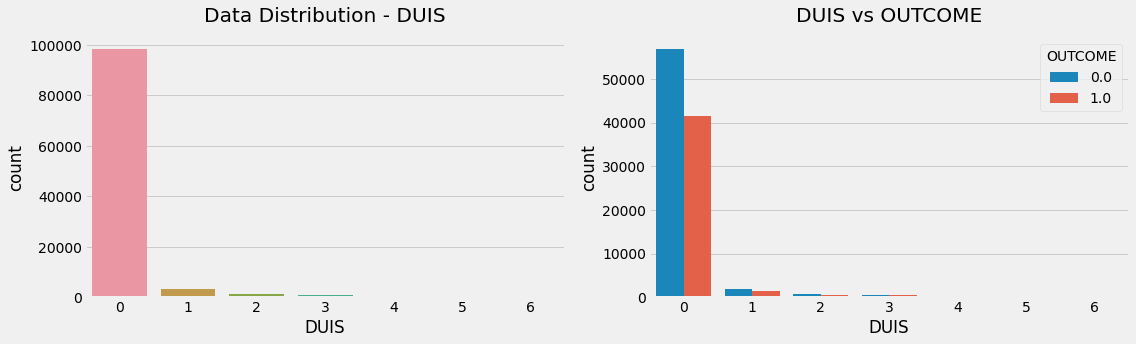

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(x='DUIS', data=train, ax=ax[0])
sns.countplot(x='DUIS', hue='OUTCOME', data=train, ax=ax[1])
ax[0].set_title(f"Data Distribution - DUIS", pad=15)
ax[1].set_title(f"DUIS vs OUTCOME", pad=15)
fig.tight_layout();

### PAST_ACCIDENTS

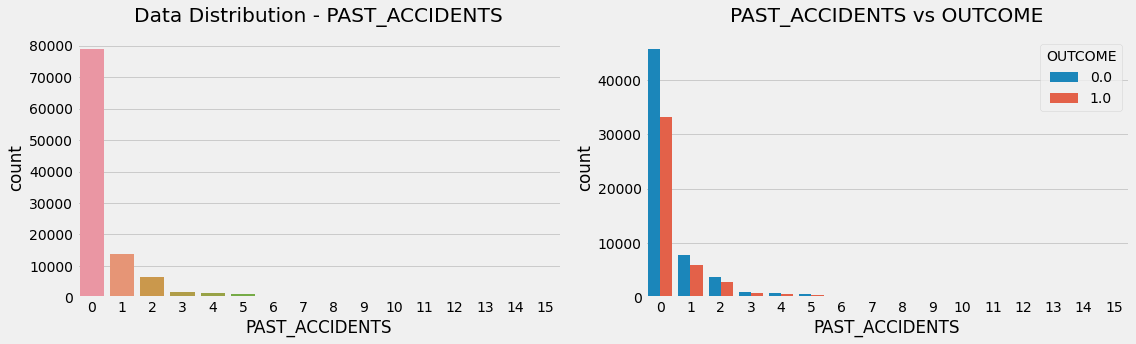

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(x='PAST_ACCIDENTS', data=train, ax=ax[0])
sns.countplot(x='PAST_ACCIDENTS', hue='OUTCOME', data=train, ax=ax[1])
ax[0].set_title(f"Data Distribution - PAST_ACCIDENTS", pad=15)
ax[1].set_title(f"PAST_ACCIDENTS vs OUTCOME", pad=15)
fig.tight_layout();

### TYPE_OF_VEHICLE

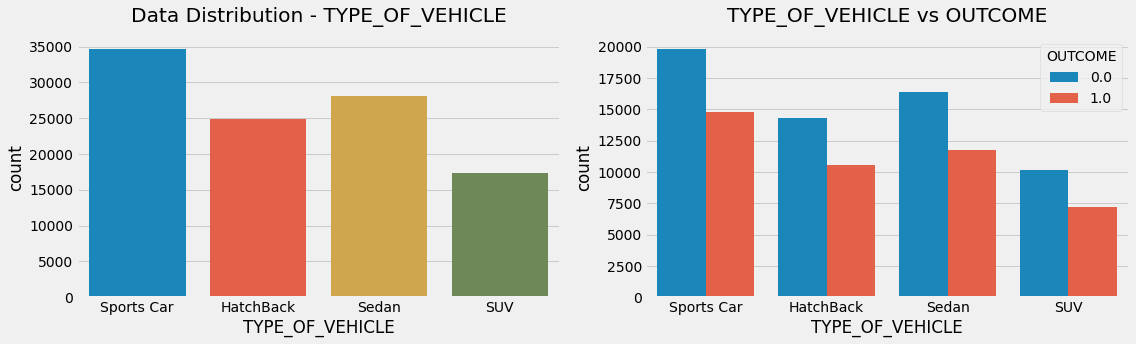

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(x='TYPE_OF_VEHICLE', data=train, ax=ax[0])
sns.countplot(x='TYPE_OF_VEHICLE', hue='OUTCOME', data=train, ax=ax[1])
ax[0].set_title(f"Data Distribution - TYPE_OF_VEHICLE", pad=15)
ax[1].set_title(f"TYPE_OF_VEHICLE vs OUTCOME", pad=15)
fig.tight_layout();

## Data preprocessing

In [40]:
def preprocess_data(df):
    df['AGE'] = df['AGE'].map({
        '16-25': 0, 
        '26-39': 1, 
        '40-64': 2, 
        '65+': 3
    })
    
    df['GENDER'] = df['GENDER'].map({
        'male': 0, 
        'female': 1
    })
    
    df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].map({
        '0-9y': 0, 
        '10-19y': 1, 
        '20-29y': 2,
        '30y+': 3
    })
    
    df['EDUCATION'] = df['EDUCATION'].map({
        'none': 0, 
        'high school': 1, 
        'university': 2
    })
    
    df['INCOME'] = df['INCOME'].map({
        'poverty': 0, 
        'working class': 1, 
        'middle class': 2, 
        'upper class': 3
    })
    
    df['VEHICLE_YEAR'] = df['VEHICLE_YEAR'].map({
        'before 2015': 0, 
        'after 2015': 1
    })
    
    df['POSTAL_CODE0'] = df['POSTAL_CODE'].apply(lambda x: int(str(x)[0]))
    df['POSTAL_CODE1'] = df['POSTAL_CODE'].apply(lambda x: int(str(x)[1]))
    df['POSTAL_CODE2'] = df['POSTAL_CODE'].apply(lambda x: int(str(x)[2]))
    df['POSTAL_CODE3'] = df['POSTAL_CODE'].apply(lambda x: int(str(x)[3]))
    df['POSTAL_CODE4'] = df['POSTAL_CODE'].apply(lambda x: int(str(x)[4]))
    
    df['TYPE_OF_VEHICLE'] = df['TYPE_OF_VEHICLE'].map({
        'SUV': 0, 
        'Sedan': 1, 
        'HatchBack': 2, 
        'Sports Car': 3
    })
    
    df['US_STATE'] = df['US_STATE'].map({
        'AL': 1,
        'AK': 2,
        'AZ': 3,
        'AR': 4,
        'CA': 5,
        'CO': 6,
        'CT': 7,
        'DE': 8,
        'FL': 9,
        'GA': 10,
        'HI': 11,
        'ID': 12,
        'IL': 13,
        'IN': 14,
        'IA': 15,
        'KS': 16,
        'KY': 17,
        'LA': 18,
        'ME': 19,
        'MD': 20,
        'MA': 21,
        'MI': 22,
        'MN': 23,
        'MS': 24,
        'MO': 25,
        'MT': 26,
        'NE': 27,
        'NV': 28,
        'NH': 29,
        'NJ': 30,
        'NM': 31,
        'NY': 32,
        'NC': 33,
        'ND': 34,
        'OH': 35,
        'OK': 36,
        'OR': 37,
        'PA': 38,
        'RI': 39,
        'SC': 40,
        'SD': 41,
        'TN': 42,
        'TX': 43,
        'UT': 44,
        'VT': 45,
        'VA': 46,
        'WA': 47,
        'WV': 48,
        'WI': 49,
        'WY': 50,
        'Not Available': 0
    })
    
    df.drop(['POSTAL_CODE'], 
            axis=1, inplace=True)
    
    return df

In [41]:
train = preprocess_data(train)
train.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,...,ID3,ID4,ID5,CREDIT_SCORE_BIN,US_STATE,POSTAL_CODE0,POSTAL_CODE1,POSTAL_CODE2,POSTAL_CODE3,POSTAL_CODE4
0,816393,2,1,2,2,2,0.638050,0.0,1,0.0,...,3,9,3,3,10,3,7,3,7,9
1,251762,1,0,2,1,2,0.475741,1.0,0,1.0,...,7,6,2,2,32,1,0,2,3,8
2,481952,2,0,2,0,2,0.839817,1.0,0,1.0,...,9,5,2,4,32,1,0,2,3,8
3,3506,2,0,2,1,3,0.682527,1.0,0,0.0,...,5,0,6,3,5,9,2,0,9,9
4,498013,2,1,2,0,1,0.572184,1.0,1,1.0,...,0,1,3,2,9,3,2,1,2,2


## Features correlation

In [42]:
train = train[[
    'ID',
    'AGE',
    'GENDER',
    'DRIVING_EXPERIENCE',
    'EDUCATION',
    'INCOME',
    'CREDIT_SCORE',
    'VEHICLE_OWNERSHIP',
    'VEHICLE_YEAR',
    'MARRIED',
    'CHILDREN',
    'ANNUAL_MILEAGE',
    'SPEEDING_VIOLATIONS',
    'DUIS',
    'PAST_ACCIDENTS',
    'TYPE_OF_VEHICLE',
    'ID0',
    'ID1',
    'ID2',
    'ID3',
    'ID4',
    'ID5',
    'CREDIT_SCORE_BIN',
    'US_STATE',
    'POSTAL_CODE0',
    'POSTAL_CODE1',
    'POSTAL_CODE2',
    'POSTAL_CODE3',
    'POSTAL_CODE4',
    'OUTCOME'
]].copy()

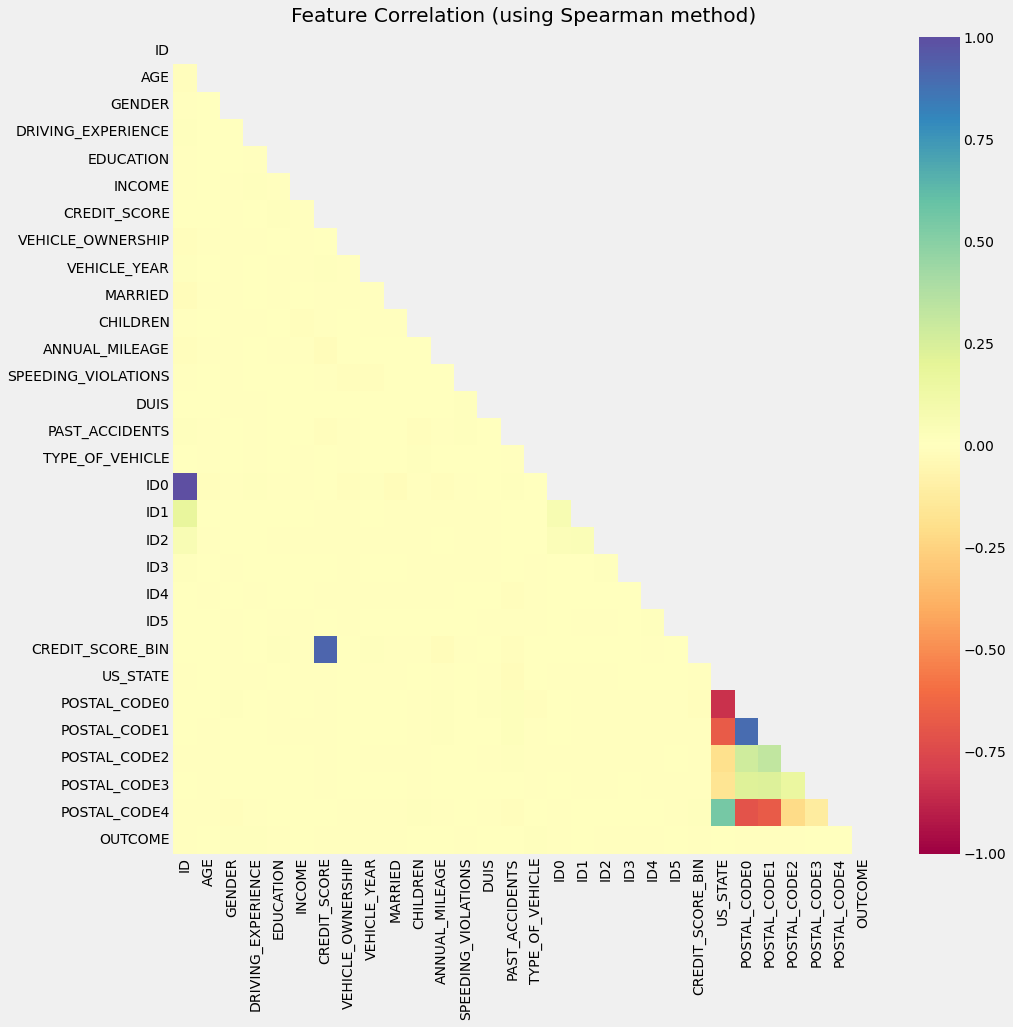

In [43]:
plt.figure(figsize=(14, 14))
sns.heatmap(train.corr(method='spearman'), annot=None, 
            mask=np.triu(train.corr(method='spearman')), 
            vmin=-1, vmax=1, center= 0, cmap='Spectral')
plt.title("Feature Correlation (using Spearman method)", pad=15);

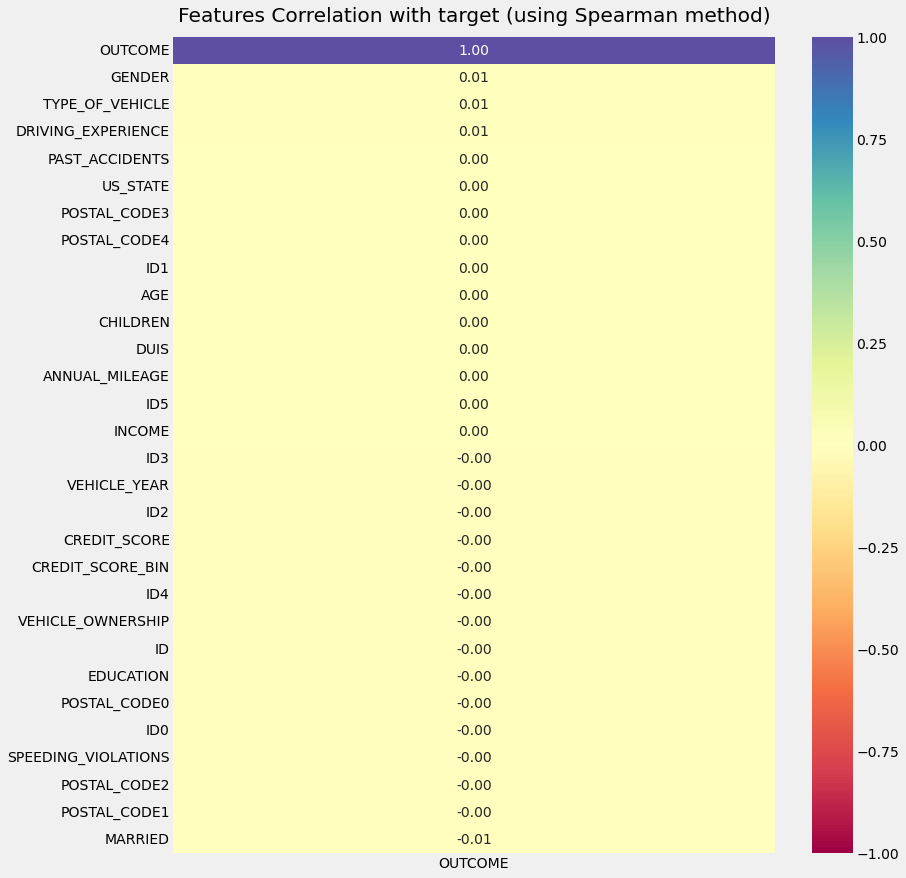

In [44]:
plt.figure(figsize=(12, 14))
sns.heatmap(train.corr(method='spearman')[['OUTCOME']].sort_values(by='OUTCOME', ascending=False), 
            annot=True, fmt='.2f', vmin=-1, vmax=1, center= 0, cmap='Spectral')
plt.title("Features Correlation with target (using Spearman method)", pad=15);

## T-SNE data distribution

In [45]:
features = [col for col in train.columns if col != 'OUTCOME']
train_scaled = train[features].copy()

scaler = StandardScaler().fit(train_scaled[features])
train_scaled[features] = scaler.transform(train_scaled[features])

In [46]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(train_scaled)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 105000 samples in 0.003s...
[t-SNE] Computed neighbors for 105000 samples in 227.835s...
[t-SNE] Computed conditional probabilities for sample 1000 / 105000
[t-SNE] Computed conditional probabilities for sample 2000 / 105000
[t-SNE] Computed conditional probabilities for sample 3000 / 105000
[t-SNE] Computed conditional probabilities for sample 4000 / 105000
[t-SNE] Computed conditional probabilities for sample 5000 / 105000
[t-SNE] Computed conditional probabilities for sample 6000 / 105000
[t-SNE] Computed conditional probabilities for sample 7000 / 105000
[t-SNE] Computed conditional probabilities for sample 8000 / 105000
[t-SNE] Computed conditional probabilities for sample 9000 / 105000
[t-SNE] Computed conditional probabilities for sample 10000 / 105000
[t-SNE] Computed conditional probabilities for sample 11000 / 105000
[t-SNE] Computed conditional probabilities for sample 12000 / 105000
[t-SNE] Computed conditional prob

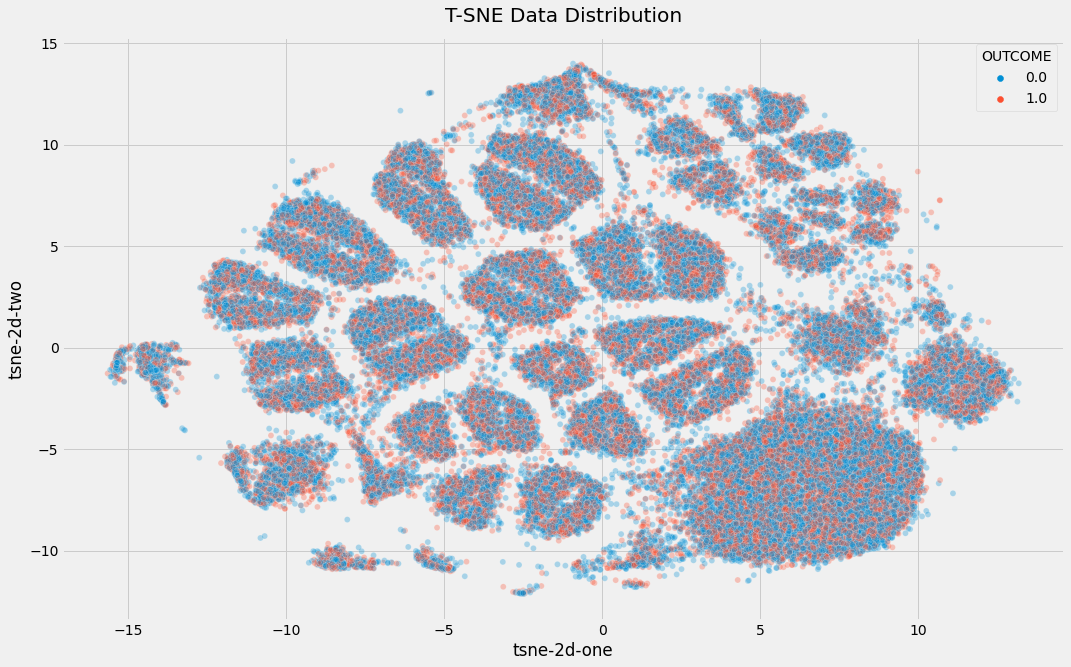

In [47]:
train_scaled['tsne-2d-one'] = tsne_results[:,0]
train_scaled['tsne-2d-two'] = tsne_results[:,1]
train_scaled['OUTCOME'] = train['OUTCOME']

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue="OUTCOME",
    data=train_scaled,
    legend="full",
    alpha=0.3
)
plt.title("T-SNE Data Distribution", pad=15);

In [48]:
## Good Day!!